In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
time_df = pd.read_csv('log.csv')
time_df.head()

,N,L,choice,numProc,numThread,timeTaken
0,120,18,0,6,6,0.000101
1,120,18,0,6,6,0.000099
2,120,18,0,6,6,0.000101
3,120,18,0,6,6,0.000107
4,120,18,1,6,6,0.000040


In [3]:
time_120_df = time_df[time_df["N"] == 120]
time_10549_df = time_df[time_df["N"] == 10549]
time_147023_df = time_df[time_df["N"] == 147023]

In [4]:
time_120_df_mean = time_120_df.groupby("choice").mean()
time_10549_df_mean = time_10549_df.groupby("choice").mean()
time_147023_df_mean = time_147023_df.groupby("choice").mean()

time_120_df_std = time_120_df.groupby("choice").std()
time_10549_df_std = time_10549_df.groupby("choice").std()
time_147023_df_std = time_147023_df.groupby("choice").std()

In [5]:
categories = ["Serial Base", "Serial Optimised", "MPI Base", "MPI Optimised", "MPI Rebalanced", "OpenMP", "Serial Cell", "MPI Cell", "OpenMP Cell"]

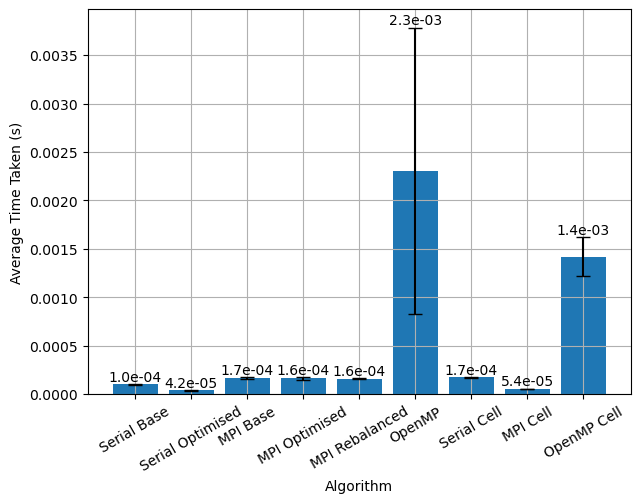

In [6]:
plt.figure(figsize=(7, 5))
plt.bar_label(plt.bar(categories, time_120_df_mean["timeTaken"], yerr=time_120_df_std["timeTaken"], capsize=5), fmt="%.1e")
plt.xlabel("Algorithm")
plt.ylabel("Average Time Taken (s)")
plt.xticks(rotation=30)
plt.grid()

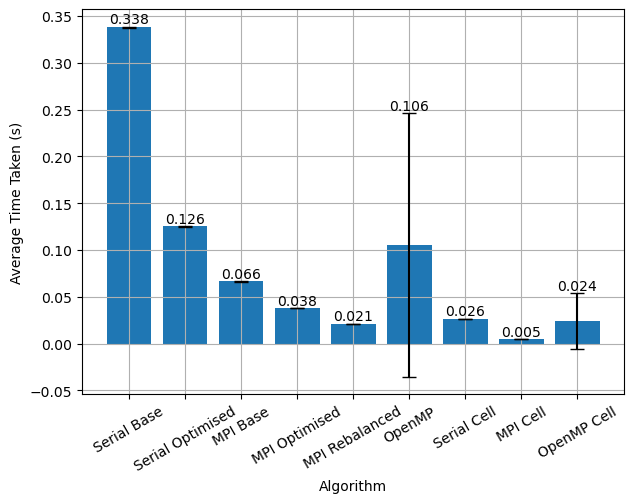

In [7]:
plt.figure(figsize=(7, 5))
plt.bar_label(plt.bar(categories, time_10549_df_mean["timeTaken"], yerr=time_10549_df_std["timeTaken"], capsize=5), fmt="%.3f")
plt.xlabel("Algorithm")
plt.ylabel("Average Time Taken (s)")
plt.xticks(rotation=30)
plt.grid()


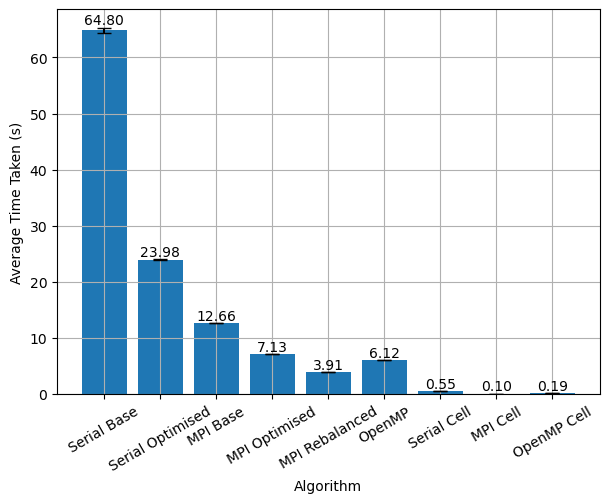

In [8]:
plt.figure(figsize=(7, 5))
plt.bar_label(plt.bar(categories, time_147023_df_mean["timeTaken"], yerr=time_147023_df_std["timeTaken"], capsize=5), fmt="%.2f")
plt.xlabel("Algorithm")
plt.ylabel("Average Time Taken (s)")
plt.xticks(rotation=30)
plt.grid()


---------------


In [9]:
output_120_df = pd.read_table('output_120_0.txt', delim_whitespace=True)
output_10549_df = pd.read_table('output_10549_0.txt', delim_whitespace=True)
output_147023_df = pd.read_table('output_147023_0.txt', delim_whitespace=True)

In [10]:
output_120_df_mean = output_120_df["numNeighbours"].mean()
output_10549_df_mean = output_10549_df["numNeighbours"].mean()
output_147023_df_mean = output_147023_df["numNeighbours"].mean()

output_120_df_median = output_120_df["numNeighbours"].median()
output_10549_df_median = output_10549_df["numNeighbours"].median()
output_147023_df_median = output_147023_df["numNeighbours"].median()

output_120_df_max = output_120_df["numNeighbours"].max()
output_10549_df_max = output_10549_df["numNeighbours"].max()
output_147023_df_max = output_147023_df["numNeighbours"].max()

output_120_df_min = output_120_df["numNeighbours"].min()
output_10549_df_min = output_10549_df["numNeighbours"].min()
output_147023_df_min = output_147023_df["numNeighbours"].min()

In [11]:
print("120: Mean:", output_120_df_mean, "Median:", output_120_df_median, "Max:", output_120_df_max, "Min:", output_120_df_min)
print("10549: Mean:", output_10549_df_mean, "Median:", output_10549_df_median, "Max:", output_10549_df_max, "Min:", output_10549_df_min)
print("147023: Mean:", output_147023_df_mean, "Median:", output_147023_df_median, "Max:", output_147023_df_max, "Min:", output_147023_df_min)

120: Mean: 31.983333333333334 Median: 30.0 Max: 63 Min: 10
10549: Mean: 28.062565172054224 Median: 30.0 Max: 43 Min: 4
147023: Mean: 52.306945171843864 Median: 54.0 Max: 71 Min: 12


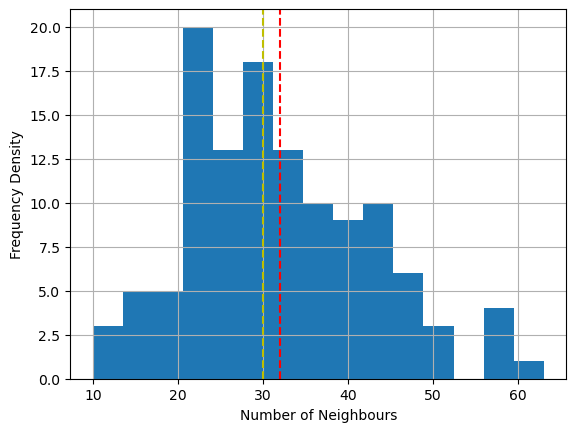

In [12]:
plt.hist(output_120_df["numNeighbours"], bins=15)
plt.xlabel("Number of Neighbours")
plt.ylabel("Frequency Density")
plt.axvline(output_120_df["numNeighbours"].mean(), color='r', linestyle='--', label="Mean")
plt.axvline(output_120_df["numNeighbours"].median(), color='y', linestyle='--', label="Median")
plt.grid()

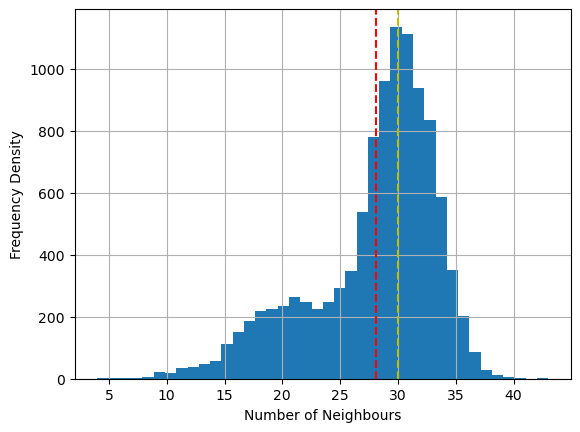

In [13]:
plt.hist(output_10549_df["numNeighbours"], bins=40)
plt.xlabel("Number of Neighbours")
plt.ylabel("Frequency Density")
plt.axvline(output_10549_df["numNeighbours"].mean(), color='r', linestyle='--', label="Mean")
plt.axvline(output_10549_df["numNeighbours"].median(), color='y', linestyle='--', label="Median")
plt.grid()

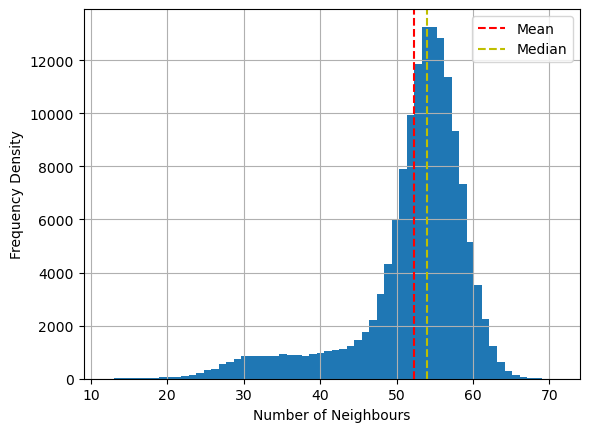

In [14]:
plt.hist(output_147023_df["numNeighbours"], bins=60)
plt.axvline(output_147023_df["numNeighbours"].mean(), color='r', linestyle='--', label="Mean")
plt.axvline(output_147023_df["numNeighbours"].median(), color='y', linestyle='--', label="Median")
plt.xlabel("Number of Neighbours")
plt.ylabel("Frequency Density")
plt.grid()
plt.legend()

-------------

In [15]:
df_times = pd.read_csv("logMPI.csv")

In [16]:
df_times.head()

,N,L,choice,numProc,numThread,timeTaken
0,120,18,4,1,1,0.000077
1,120,18,4,2,2,0.000692
2,120,18,4,4,4,0.000818
3,120,18,4,3,3,0.000082
4,120,18,4,5,5,0.000611


In [17]:
df_times_4 = df_times[df_times["choice"] == 4]
df_times_5 = df_times[df_times["choice"] == 5]

df_times_8 = df_times[df_times["choice"] == 8]
df_times_9 = df_times[df_times["choice"] == 9]

In [18]:
df_times_4_120 = df_times_4[df_times_4["N"] == 120]
df_times_4_10549 = df_times_4[df_times_4["N"] == 10549]
df_times_4_147023 = df_times_4[df_times_4["N"] == 147023]

df_times_5_120 = df_times_5[df_times_5["N"] == 120]
df_times_5_10549 = df_times_5[df_times_5["N"] == 10549]
df_times_5_147023 = df_times_5[df_times_5["N"] == 147023]

df_times_8_120 = df_times_8[df_times_8["N"] == 120]
df_times_8_10549 = df_times_8[df_times_8["N"] == 10549]
df_times_8_147023 = df_times_8[df_times_8["N"] == 147023]

df_times_9_120 = df_times_9[df_times_9["N"] == 120]
df_times_9_10549 = df_times_9[df_times_9["N"] == 10549]
df_times_9_147023 = df_times_9[df_times_9["N"] == 147023]

In [19]:
df_times_4_120_grouped_mean = df_times_4_120.groupby("numProc").mean()
df_times_4_10549_grouped_mean = df_times_4_10549.groupby("numProc").mean()
df_times_4_147023_grouped_mean = df_times_4_147023.groupby("numProc").mean()

df_times_5_120_grouped_mean = df_times_5_120.groupby("numProc").mean()
df_times_5_10549_grouped_mean = df_times_5_10549.groupby("numProc").mean()
df_times_5_147023_grouped_mean = df_times_5_147023.groupby("numProc").mean()

df_times_8_120_grouped_mean = df_times_8_120.groupby("numProc").mean()
df_times_8_10549_grouped_mean = df_times_8_10549.groupby("numProc").mean()
df_times_8_147023_grouped_mean = df_times_8_147023.groupby("numProc").mean()

df_times_9_120_grouped_mean = df_times_9_120.groupby("numProc").mean()
df_times_9_10549_grouped_mean = df_times_9_10549.groupby("numProc").mean()
df_times_9_147023_grouped_mean = df_times_9_147023.groupby("numProc").mean()

df_times_4_120_grouped_std = df_times_4_120.groupby("numProc").std()
df_times_4_10549_grouped_std = df_times_4_10549.groupby("numProc").std()
df_times_4_147023_grouped_std = df_times_4_147023.groupby("numProc").std()

df_times_5_120_grouped_std = df_times_5_120.groupby("numProc").std()
df_times_5_10549_grouped_std = df_times_5_10549.groupby("numProc").std()
df_times_5_147023_grouped_std = df_times_5_147023.groupby("numProc").std()

df_times_8_120_grouped_std = df_times_8_120.groupby("numProc").std()
df_times_8_10549_grouped_std = df_times_8_10549.groupby("numProc").std()
df_times_8_147023_grouped_std = df_times_8_147023.groupby("numProc").std()

df_times_9_120_grouped_std = df_times_9_120.groupby("numProc").std()
df_times_9_10549_grouped_std = df_times_9_10549.groupby("numProc").std()
df_times_9_147023_grouped_std = df_times_9_147023.groupby("numProc").std()

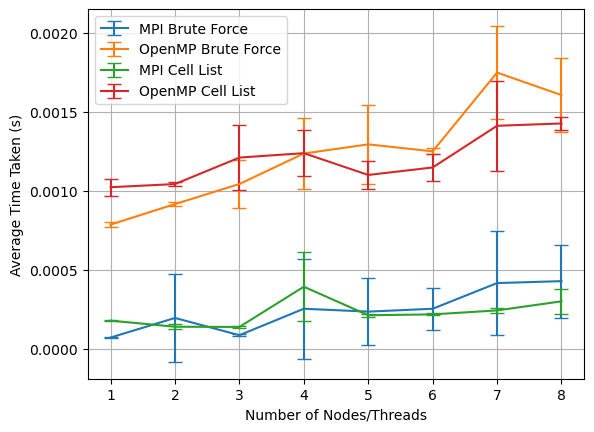

In [20]:
plt.errorbar(df_times_4_120_grouped_mean["numThread"], df_times_4_120_grouped_mean["timeTaken"] , yerr=df_times_4_120_grouped_std["timeTaken"], capsize=5, label="MPI Brute Force")
plt.errorbar(df_times_5_120_grouped_mean["numThread"], df_times_5_120_grouped_mean["timeTaken"] , yerr=df_times_5_120_grouped_std["timeTaken"], capsize=5, label="OpenMP Brute Force")
plt.errorbar(df_times_8_120_grouped_mean["numThread"], df_times_8_120_grouped_mean["timeTaken"] , yerr=df_times_8_120_grouped_std["timeTaken"], capsize=5, label="MPI Cell List")
plt.errorbar(df_times_9_120_grouped_mean["numThread"], df_times_9_120_grouped_mean["timeTaken"] , yerr=df_times_9_120_grouped_std["timeTaken"], capsize=5, label="OpenMP Cell List")
plt.xlabel("Number of Nodes/Threads")
plt.ylabel("Average Time Taken (s)")
plt.grid()
plt.legend()

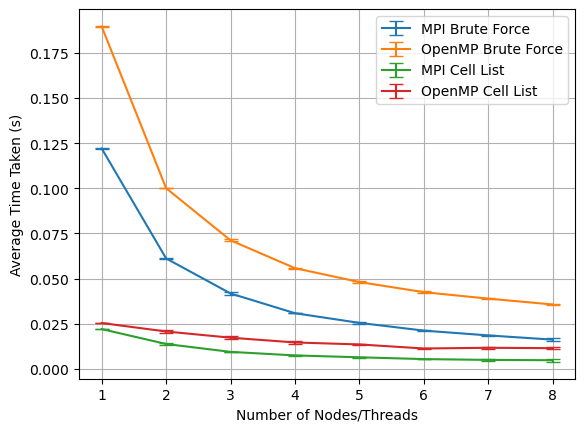

In [21]:
plt.errorbar(df_times_4_10549_grouped_mean["numThread"], df_times_4_10549_grouped_mean["timeTaken"] , yerr=df_times_4_10549_grouped_std["timeTaken"], capsize=5, label="MPI Brute Force")
plt.errorbar(df_times_5_10549_grouped_mean["numThread"], df_times_5_10549_grouped_mean["timeTaken"] , yerr=df_times_5_10549_grouped_std["timeTaken"], capsize=5, label="OpenMP Brute Force")
plt.errorbar(df_times_8_10549_grouped_mean["numThread"], df_times_8_10549_grouped_mean["timeTaken"] , yerr=df_times_8_10549_grouped_std["timeTaken"], capsize=5, label="MPI Cell List")
plt.errorbar(df_times_9_10549_grouped_mean["numThread"], df_times_9_10549_grouped_mean["timeTaken"] , yerr=df_times_9_10549_grouped_std["timeTaken"], capsize=5, label="OpenMP Cell List")

plt.xlabel("Number of Nodes/Threads")
plt.ylabel("Average Time Taken (s)")
plt.grid()
plt.legend()

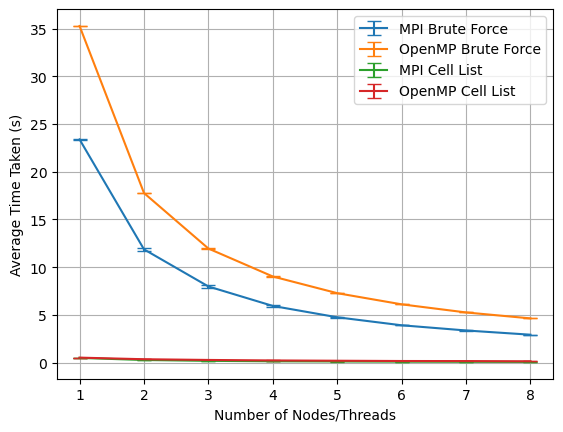

In [22]:
plt.errorbar(df_times_4_147023_grouped_mean["numThread"], df_times_4_147023_grouped_mean["timeTaken"] , yerr=df_times_4_147023_grouped_std["timeTaken"], capsize=5, label="MPI Brute Force")
plt.errorbar(df_times_5_147023_grouped_mean["numThread"], df_times_5_147023_grouped_mean["timeTaken"] , yerr=df_times_5_147023_grouped_std["timeTaken"], capsize=5, label="OpenMP Brute Force")
plt.errorbar(df_times_8_147023_grouped_mean["numThread"], df_times_8_147023_grouped_mean["timeTaken"] , yerr=df_times_8_147023_grouped_std["timeTaken"], capsize=5, label="MPI Cell List")
plt.errorbar(df_times_9_147023_grouped_mean["numThread"], df_times_9_147023_grouped_mean["timeTaken"] , yerr=df_times_9_147023_grouped_std["timeTaken"], capsize=5, label="OpenMP Cell List")
plt.xlabel("Number of Nodes/Threads")
plt.ylabel("Average Time Taken (s)")
plt.grid()
plt.legend()

Text(0, 0.5, 'Speedup')

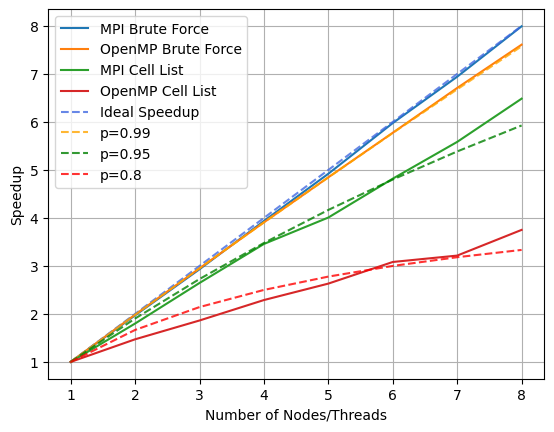

In [29]:
plt.plot(df_times_4_147023_grouped_mean["numThread"], df_times_4_147023_grouped_mean["timeTaken"][df_times_4_147023_grouped_mean.index == 1].values/df_times_4_147023_grouped_mean["timeTaken"], label="MPI Brute Force")
plt.plot(df_times_5_147023_grouped_mean["numThread"], df_times_5_147023_grouped_mean["timeTaken"][df_times_4_147023_grouped_mean.index == 1].values/df_times_5_147023_grouped_mean["timeTaken"], label="OpenMP Brute Force")
plt.plot(df_times_8_147023_grouped_mean["numThread"], df_times_8_147023_grouped_mean["timeTaken"][df_times_4_147023_grouped_mean.index == 1].values/df_times_8_147023_grouped_mean["timeTaken"], label="MPI Cell List")
plt.plot(df_times_9_147023_grouped_mean["numThread"], df_times_9_147023_grouped_mean["timeTaken"][df_times_4_147023_grouped_mean.index == 1].values/df_times_9_147023_grouped_mean["timeTaken"], label="OpenMP Cell List")

plt.plot(df_times_4_147023_grouped_mean["numThread"], df_times_4_147023_grouped_mean["numThread"], label="Ideal Speedup", linestyle="--", alpha=0.8, c="royalblue")

plt.plot(df_times_5_147023_grouped_mean["numThread"], 1 / (1 - 0.992 + (0.992/df_times_5_147023_grouped_mean["numThread"])), label="p=0.99", linestyle="--", c="orange", alpha = 0.8)
plt.plot(df_times_5_147023_grouped_mean["numThread"], 1 / (1 - 0.95 + (0.95/df_times_5_147023_grouped_mean["numThread"])), label="p=0.95", linestyle="--", c="green", alpha = 0.8)
plt.plot(df_times_5_147023_grouped_mean["numThread"], 1 / (1 - 0.8 + (0.8/df_times_5_147023_grouped_mean["numThread"])), label="p=0.8", linestyle="--", c="red", alpha = 0.8)

plt.grid()
plt.legend()


plt.xlabel("Number of Nodes/Threads")
plt.ylabel("Speedup")